In [2]:
%pip install matplotlib
%pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 7.3 MB/s eta 0:00:00


## 6.5

#### - Alunos: Antonio Roberto, Aryelson Gonçalves

### Resposta de perturbação com Kp = 10 e KD = 5.

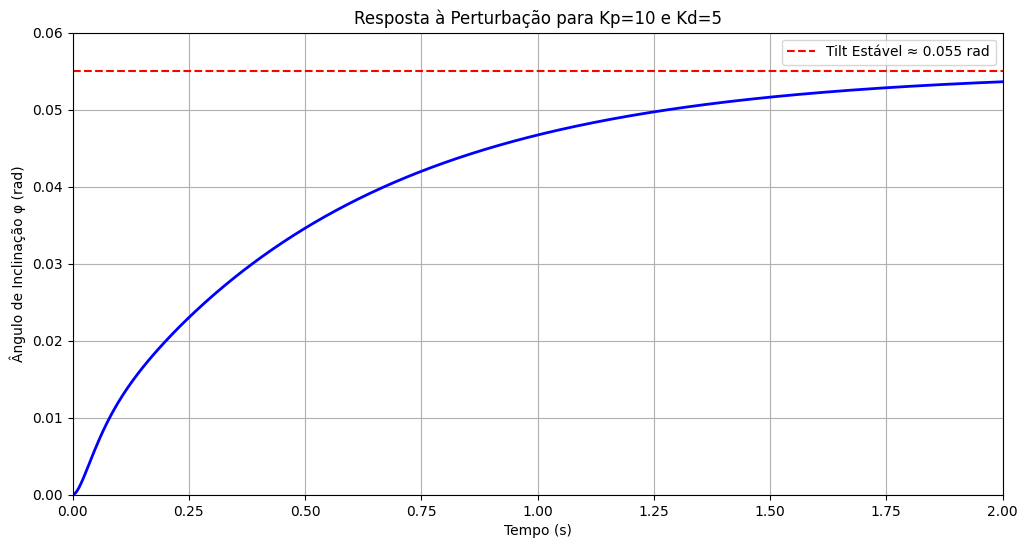

In [3]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

h = 0.3
c = 0.5
L = 0.1
v = 2.0
tau = 0.1
g = 9.806

a1 = g/h
a2 = v**2/(h*c)
a3 = v*L/(h*c)

Kp = 10
Kd = 5

num = [tau, 1]
den = [tau,
       1 + Kd*a3,
       Kd*a2 + Kp*a3 - tau*a1,
       Kp*a2 - a1]

sys_dist = ct.TransferFunction(num, den)

Td_magnitude = 0.055 * (Kp*a2 - a1)

t = np.linspace(0, 2, 1000)
t, y = ct.step_response(sys_dist*Td_magnitude, T=t)

plt.figure(figsize=(12, 6))
plt.plot(t, y, 'b-', linewidth=2)
plt.title('Resposta à Perturbação para Kp=10 e Kd=5')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo de Inclinação φ (rad)')
plt.grid(True)
plt.axhline(y=0.055, color='r', linestyle='--', label='Tilt Estável ≈ 0.055 rad')
plt.legend()
plt.xlim(0, 2)
plt.ylim(0, 0.06)
plt.show()

## 6.6

### Gráfico de localizações de raízes de $q(s) = s^3 + 2s^2 + 4s + K$ para $0 … K … 20.$

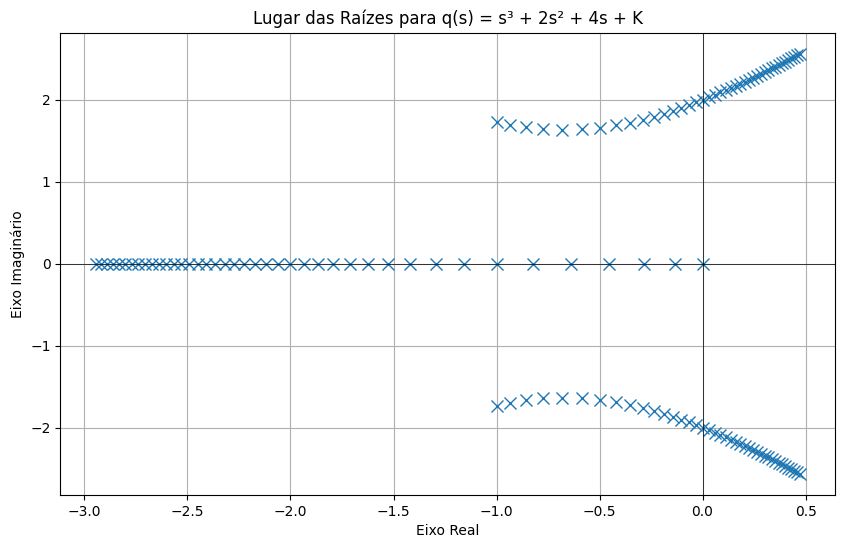

In [4]:
import numpy as np
import matplotlib.pyplot as plt

K = np.arange(0, 20.1, 0.5)

roots = []

for ki in K:
    coeffs = [1, 2, 4, ki]
    roots.append(np.roots(coeffs))

real_parts = []
imag_parts = []

for root_set in roots:
    for root in root_set:
        real_parts.append(root.real)
        imag_parts.append(root.imag)

plt.figure(figsize=(10, 6))
plt.plot(real_parts, imag_parts, 'x', markersize=8)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.title('Lugar das Raízes para q(s) = s³ + 2s² + 4s + K')
plt.xlabel('Eixo Real')
plt.ylabel('Eixo Imaginário')
plt.show()

### Região de estabilidade para a e K para controle de curva de veículo de duas pistas.

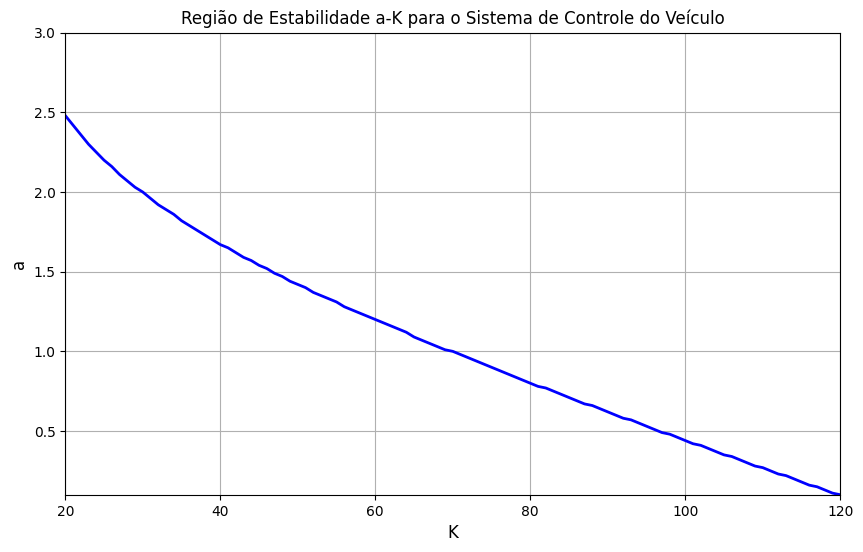

In [5]:
import numpy as np
import matplotlib.pyplot as plt

a = np.arange(0.1, 3.01, 0.01)
K = np.arange(20, 121, 1)

x = np.zeros_like(K, dtype=float)
y = np.zeros_like(K, dtype=float)

for i, Ki in enumerate(K):
    for j, aj in enumerate(a):
        q = [1, 8, 17, Ki + 10, Ki * aj]

        roots = np.roots(q)

        if np.max(np.real(roots)) > 0:
            x[i] = Ki
            y[i] = a[j-1] if j > 0 else 0.0  # Prevenir índice negativo
            break

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.grid(True)
plt.xlabel('K', fontsize=12)
plt.ylabel('a', fontsize=12)
plt.title('Região de Estabilidade a-K para o Sistema de Controle do Veículo')
plt.xlim(20, 120)
plt.ylim(0.1, 3.0)
plt.show()

### Resposta de rampa para a = 0,6 e K = 70 para controle de curva de veículo de duas pistas

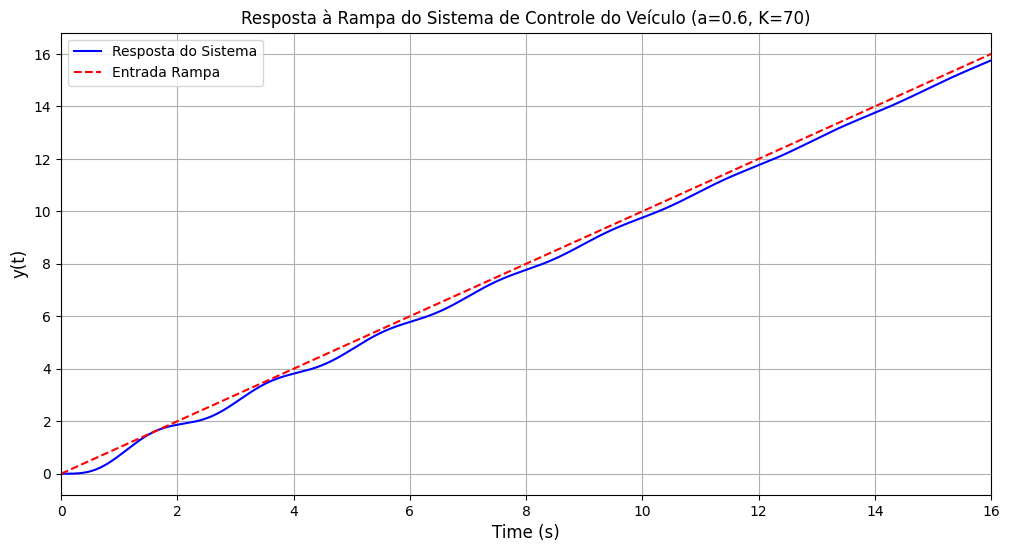

In [6]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 16.01, 0.01)
u = t

numgc = [1, 0.6]
dengc = [1, 1]
sysgc = ct.TransferFunction(numgc, dengc)

numg = [70]
deng = [1, 7, 10, 0]
sysg = ct.TransferFunction(numg, deng)

sysa = ct.series(sysgc, sysg)

sys = ct.feedback(sysa, 1)

t, y = ct.forced_response(sys, t, u)

plt.figure(figsize=(12, 6))
plt.plot(t, y, 'b-', label='Resposta do Sistema')
plt.plot(t, u, 'r--', label='Entrada Rampa')
plt.grid(True)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('y(t)', fontsize=12)
plt.title('Resposta à Rampa do Sistema de Controle do Veículo (a=0.6, K=70)')
plt.legend()
plt.xlim(0, 16)
plt.show()

## 6.7

### Resposta do sistema com feedback de velocidade. (a) script de arquivo m. (b) Resposta com Ka = 100 e K1 = 0,05.

0 states have been removed from the model


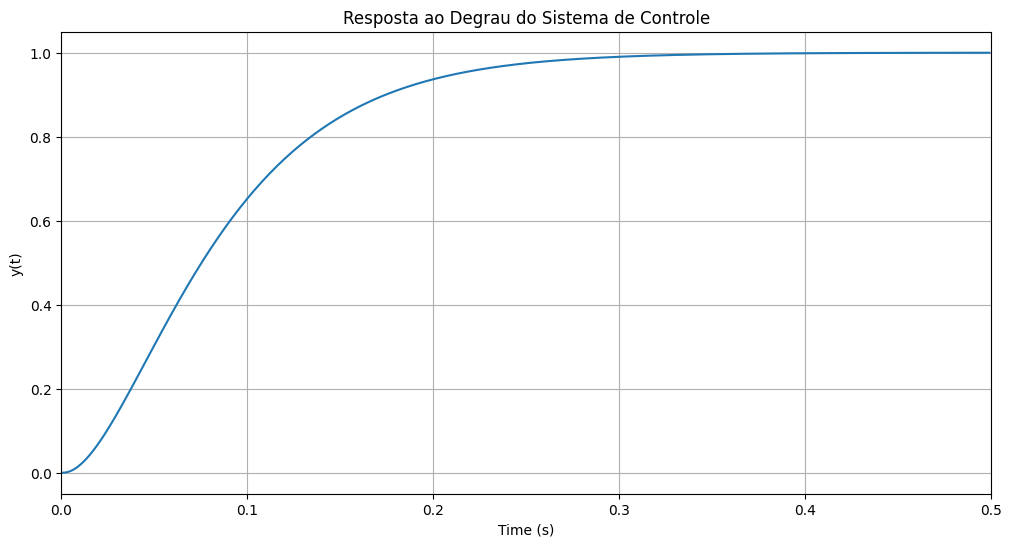

In [7]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

Ka = 100
K1 = 0.05

sys1 = ct.TransferFunction([5000], [1, 1000])
sys2 = ct.TransferFunction([1], [1, 20, 0])
sysc = ct.TransferFunction([K1, 1], [1])

syso = ct.series(Ka * sys1, sys2)

sys = ct.feedback(syso, sysc)
sys = ct.minreal(sys)

t = np.arange(0, 0.5, 0.001)
t, y = ct.step_response(sys, t)

plt.figure(figsize=(12, 6))
plt.plot(t, y)
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('y(t)')
plt.title('Resposta ao Degrau do Sistema de Controle')
plt.xlim(0, 0.5)
plt.show()